# 7章 GLMで説明できないデータ

100個体の架空植物から取り出した8個の種子のうちいくつが生存しているかに対して、<br>
葉数の増加がどう影響しているのかを調べる。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.font_manager as fm

data = pd.read_csv('./data5.csv')
#fp = fm.FontProperties(fname='/Library/Fonts/Yu Gothic Medium.otf', size=12)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
N     100 non-null int64
y     100 non-null int64
x     100 non-null int64
id    100 non-null int64
dtypes: int64(4)
memory usage: 3.2 KB


In [3]:
data.describe()

,N,y,x,id
count,100.0,100.000000,100.000000,100.000000
mean,8.0,3.810000,4.000000,50.500000
std,0.0,3.070534,1.421338,29.011492
min,8.0,0.000000,2.000000,1.000000
25%,8.0,1.000000,3.000000,25.750000
50%,8.0,3.000000,4.000000,50.500000
75%,8.0,7.000000,5.000000,75.250000
max,8.0,8.000000,6.000000,100.000000


個体数は100個であり、

N: 1個体から取り出す種子数 (8個で固定)<br>
y: 生存種子数<br>
x: 葉数<br>
id: 個体に振られた番号<br>
である。

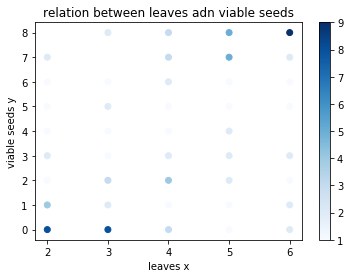

In [4]:
%matplotlib inline
data_for_plot = data.groupby(['x', 'y']).size().reset_index().rename(columns={0: 'num'})

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# http://matplotlib.org/examples/color/colormaps_reference.html
fig.colorbar(ax.scatter(data_for_plot.x, data_for_plot.y, c=data_for_plot.num, cmap=cm.Blues))
ax.set_xlabel('leaves x')
ax.set_ylabel('viable seeds y')
ax.set_title('relation between leaves adn viable seeds')
#fig.show()

葉数と生存種子数の関係を示す散布図。

色が濃いほど多くの点が重なっていることを示す。<br>
例えば、x=6でy=8の個体数は9。

## ロジスティック回帰でfitting

「N個の種子のうちy個が生存した」というカウントデータなのでロジスティック回帰でモデリングする。

個体iでの種子の生存確率 $q_i$ が葉数 $x_i$ に依存するので<br>
線形予測子とロジットリンク関数を組み合わせて以下の式で表される。

$logit(q_{i})=\beta_{1}+\beta_{2}x_{i} \tag{1}
\label{eq:tag1}$


In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.core import datetools
glm = smf.glm(formula='y + I(N - y) ~ x', data=data, family=sm.families.Binomial())
res = glm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      ['y', 'I(N - y)']   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -322.80
Date:                Tue, 16 Jan 2018   Deviance:                       513.84
Time:                        13:26:16   Pearson chi2:                     53.5
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1487      0.237     -9.057      0.000      -2.614      -1.684
x              0.5104      0.056      9.179      0.000       0.401       0.619
==============================================================================
"""

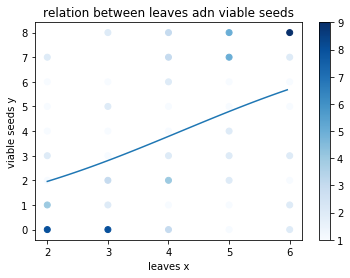

In [12]:
N = 8
xrange = np.arange(min(data.x), max(data.x), (max(data.x) - min(data.x)) / 100)
x_test = pd.DataFrame({'x': xrange})
y_test = res.predict(x_test)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
fig.colorbar(ax.scatter(data_for_plot.x, data_for_plot.y, c=data_for_plot.num, cmap=cm.Blues))

ax.plot(x_test, y_test * N, label='C')
ax.set_xlabel('leaves x')
ax.set_ylabel('viable seeds y')
ax.set_title('relation between leaves adn viable seeds')